In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker
from functools import partial
import seaborn as sns
from datetime import date, datetime
import dataframe_image as dfi
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_theme()

# Home Price Analysis

In [3]:
#Load Housing price datasets
psale_df = pd.read_csv('C:/Users/jlixa/Desktop/CUNY/Spring23/Data602/final_project/datasets/Metro_median_sale_price_uc_sfrcondo_month.csv')

#filter dataset to 'STATE' level and NAICS Title
psale_df = psale_df[psale_df['StateName'] == "NY"]

psale_df.head(2)

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
1,394913,1,"New York, NY",msa,NY,404586.0,399000.0,400000.0,400000.0,405000.0,...,539000.0,539990.0,560000.0,580000.0,575000.0,550000.0,532000.0,525000.0,520000.0,520000.0
49,394425,49,"Buffalo, NY",msa,NY,103000.0,116900.0,110000.0,119000.0,122650.0,...,205000.0,228200.0,240000.0,241000.0,240000.0,230000.0,225000.0,228000.0,215062.0,222250.0


In [4]:
psale_df_melted = psale_df.melt(id_vars=['RegionID','SizeRank','RegionName','RegionType','StateName'], 
                         var_name = 'Date', 
                         value_name = 'Med_House_Price'
                        )

psale_df_melted['Date'] = pd.to_datetime(psale_df_melted['Date'])
psale_df_melted['Date'] = psale_df_melted['Date'].dt.to_period('M')

#filter dataset to 2013 and beyond with mask
mask = psale_df_melted['Date'] >= '2013-01'
psale_df_melted = psale_df_melted.loc[mask]

psale_df_melted.head(2)

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Med_House_Price
885,394913,1,"New York, NY",msa,NY,2013-01,350000.0
886,394425,49,"Buffalo, NY",msa,NY,2013-01,119500.0


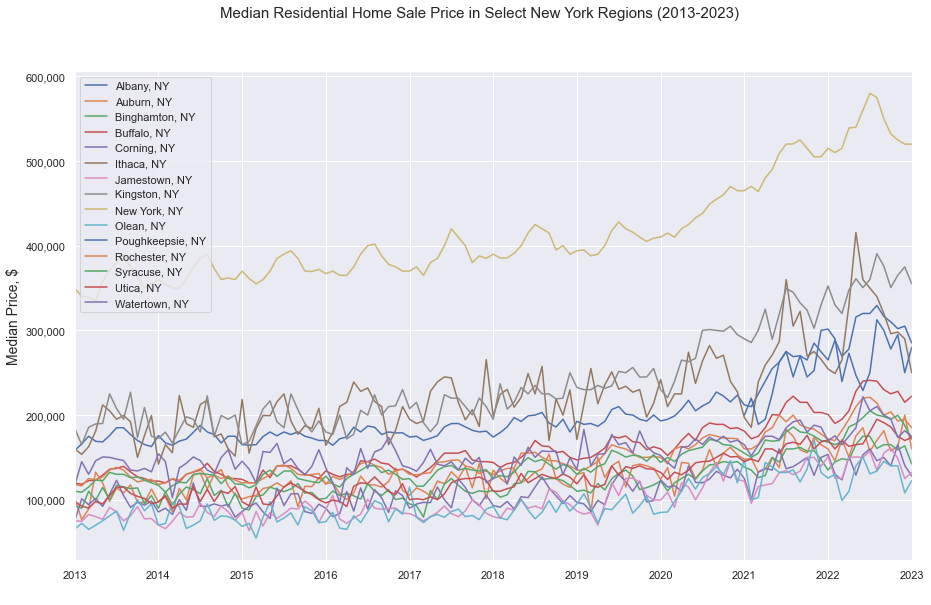

In [5]:
#Plot
fig1, ax1 = plt.subplots(figsize=(15,9)) #Create subplot

#add title
fig1.suptitle("Median Residential Home Sale Price in Select New York Regions (2013-2023)",fontsize=15)

#plot lines
for label, grp in psale_df_melted.groupby('RegionName'):
    grp.plot(x = "Date", y = 'Med_House_Price',ax = ax1, label = label)
    
#Axis edits
ax1.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.set_ylabel("Median Price, $")
ax1.set_xlabel(" ")
ax1.yaxis.get_label().set_fontsize(14)
ax1.xaxis.get_label().set_fontsize(14)

#Save Graph
fig1.savefig('graphs_and_tables/Median_Residential_Home_Sale_Price_in_Select_New_York_Regions_(2013-2023).png')

In [6]:
#Getting % change between min(date) and max(date) - Home Price
psale_df_datefiltered = psale_df[['RegionName', '2013-01-31', '2023-01-31']]
psale_df_datefiltered['Med_House_Price_Delta_$'] = (psale_df_datefiltered['2023-01-31']-psale_df_datefiltered['2013-01-31'])
psale_df_datefiltered['Med_House_Price_Delta_%']= round(psale_df_datefiltered['Med_House_Price_Delta_$']/psale_df_datefiltered['2023-01-31']*100, 2)
psale_df_datefiltered.dropna(inplace=True)
#psale_df_datefiltered.head(2)

#Export dataframe
dfi.export(psale_df_datefiltered,"graphs_and_tables/df_median_sale_price_delta.png")

In [7]:
#Calculate average for all regions:
mean = psale_df_datefiltered['Med_House_Price_Delta_$'].mean()
print(f'Mean: {mean}')

_min = min(psale_df_datefiltered['Med_House_Price_Delta_%'])
_max = max(psale_df_datefiltered['Med_House_Price_Delta_%'])
print(f'Min: {_min}')
print(f'Min: {_max}')

Mean: 85419.28571428571
Min: 32.69
Min: 48.03


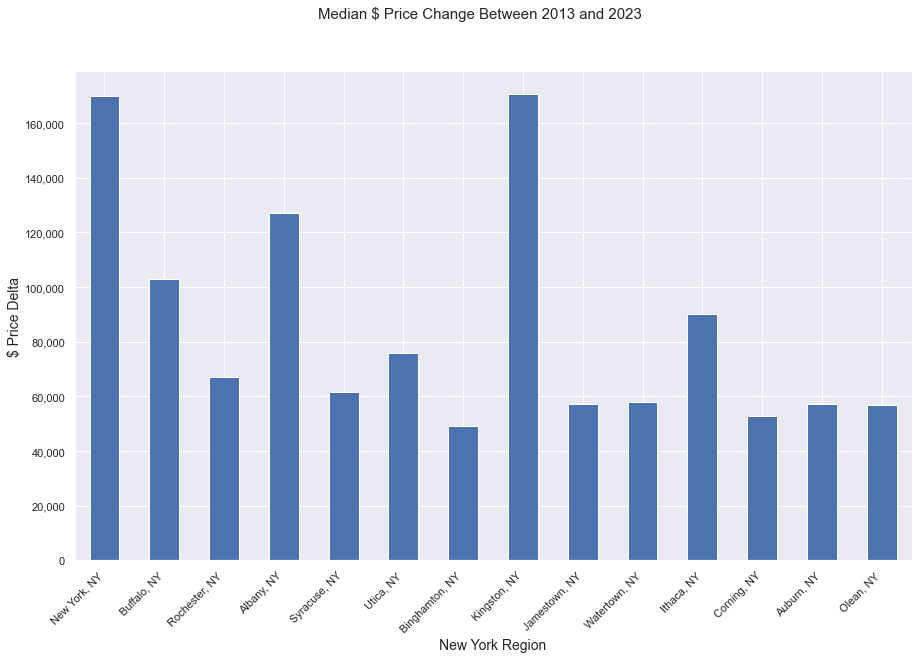

In [8]:
#Plot
fig2, ax2 = plt.subplots(figsize=(15,9)) #Create subplot

#add title
fig2.suptitle("Median $ Price Change Between 2013 and 2023", fontsize=15)

#plot bars
psale_df_datefiltered.plot(ax=ax2,
                           x= "RegionName",
                           y= "Med_House_Price_Delta_$",
                           kind='bar',
                           ylabel= "$ Price Delta",
                           xlabel= "New York Region").legend(loc='best')
#Axis edit
ax2.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
for label in ax2.get_xticklabels():
  label.set_rotation(45)
  label.set_ha('right')
ax2.yaxis.get_label().set_fontsize(14)
ax2.xaxis.get_label().set_fontsize(14)

#Legend edits
ax2.get_legend().remove()

#Save Graph
fig2.savefig('graphs_and_tables/Median_$_Price_Change_Between_2013_and_2023.png')

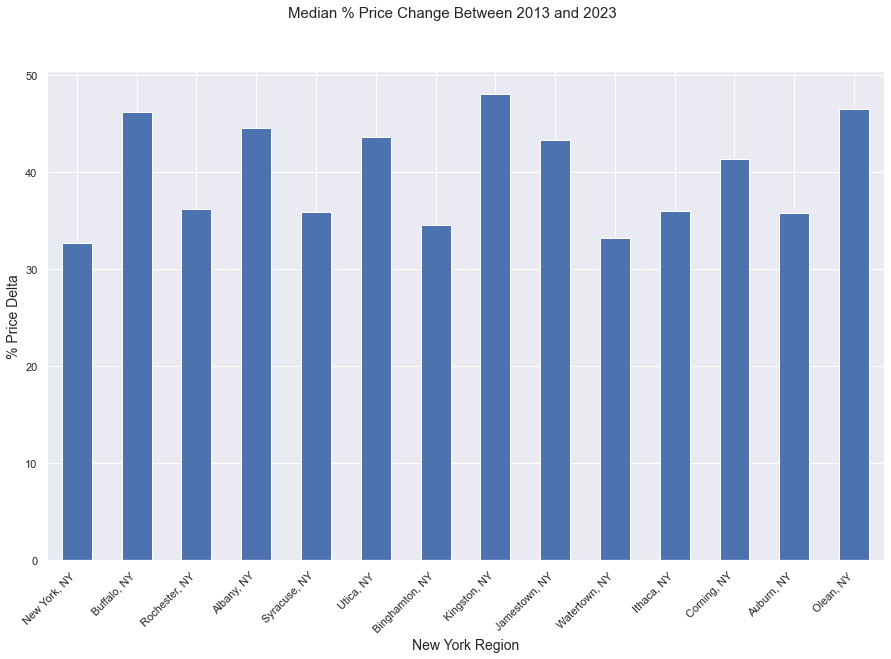

In [9]:
#Plot
fig3, ax3 = plt.subplots(figsize=(15,9)) #Create subplot

#add title
fig3.suptitle("Median % Price Change Between 2013 and 2023", fontsize=15)

#plot bars
psale_df_datefiltered.plot(ax=ax3,
                           x= "RegionName",
                           y= "Med_House_Price_Delta_%",
                           kind='bar',
                           ylabel= "% Price Delta").legend(loc='best')
#Axis edit
ax3.set_xlabel("New York Region")
for label in ax3.get_xticklabels():
  label.set_rotation(45)
  label.set_ha('right')
ax3.yaxis.get_label().set_fontsize(14)
ax3.xaxis.get_label().set_fontsize(14)

#Legend edits
ax3.get_legend().remove()

#Save Graph
fig3.savefig('graphs_and_tables/Median_%_Price_Change_Between_2013_and_2023.png')

#### Mortgage Rate Analysis

In [10]:
#Load Housing price datasets
mortgage_int_df = pd.read_csv('C:/Users/jlixa/Dropbox/Spr23/Data602/final_project/datasets/mortgage_rates/MORTGAGE30US (1).csv')

#Group by month and select max() interest rate value
mortgage_int_df['DATE'] = pd.to_datetime(mortgage_int_df['DATE'])
mortgage_int_df['DATE'] = mortgage_int_df['DATE'].dt.to_period('M')
mortgage_int_df.sort_values(['DATE','MORTGAGE30US'], ascending=[True,False], inplace = True)
mortgage_int_df = mortgage_int_df.groupby('DATE').first().reset_index()

#filter dates with mask
mask = mortgage_int_df['DATE'] >= '2013-01'
mortgage_int_df = mortgage_int_df.loc[mask]

mortgage_int_df

,DATE,MORTGAGE30US
501,2013-01,3.53
502,2013-02,3.56
503,2013-03,3.63
504,2013-04,3.54
505,2013-05,3.81
...,...,...
621,2023-01,6.48
622,2023-02,6.50
623,2023-03,6.73
624,2023-04,6.43


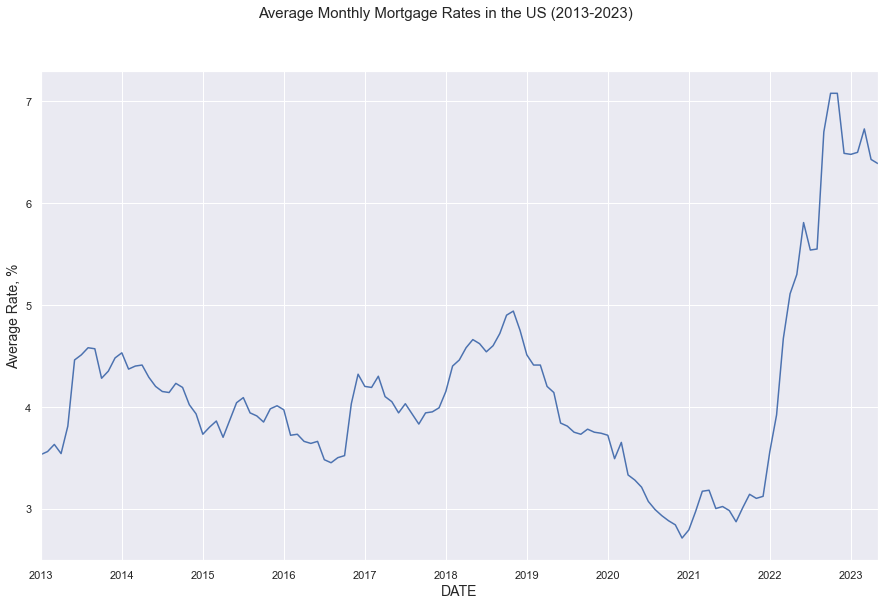

In [11]:
#Plot
fig4, ax4 = plt.subplots(figsize=(15,9)) #Create subplot

#add title
fig4.suptitle("Average Monthly Mortgage Rates in the US (2013-2023)", fontsize=15)

#plot lines
mortgage_int_df.plot(x = "DATE", y = 'MORTGAGE30US',ax = ax4)
    
#Axis edits
ax4.set_ylabel("Average Rate, %")
ax4.yaxis.get_label().set_fontsize(14)
ax4.xaxis.get_label().set_fontsize(14)

#Legend edits
ax4.get_legend().remove()

#Save Graph
fig4.savefig('graphs_and_tables/Average_Monthly_Mortgage_Rates_in_the_US_(2013-2023).png')

In [12]:
#### Left Join Mortgage Rates with median home prices
psale_df_melted_IR =  psale_df_melted.merge(mortgage_int_df.rename({'MORTGAGE30US': 'INT_RATE'}, axis=1),
               left_on='Date', right_on='DATE', how='left')

psale_df_melted_IR['EST_MONTHLY_PAYMENT'] = (psale_df_melted_IR['Med_House_Price']*0.965)*((psale_df_melted_IR['INT_RATE']/100)/12)

psale_df_melted_IR['DATE'] = psale_df_melted_IR['DATE'].astype(str)
psale_df_melted_IR['DATE'] = pd.to_datetime(psale_df_melted_IR['DATE'])
psale_df_melted_IR['DATE'] = pd.to_datetime(psale_df_melted_IR['DATE'])

psale_df_melted_IR.head(3)

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Med_House_Price,DATE,INT_RATE,EST_MONTHLY_PAYMENT
0,394913,1,"New York, NY",msa,NY,2013-01,350000.0,2013-01-01,3.53,993.547917
1,394425,49,"Buffalo, NY",msa,NY,2013-01,119500.0,2013-01-01,3.53,339.225646
2,395031,52,"Rochester, NY",msa,NY,2013-01,118000.0,2013-01-01,3.53,334.967583


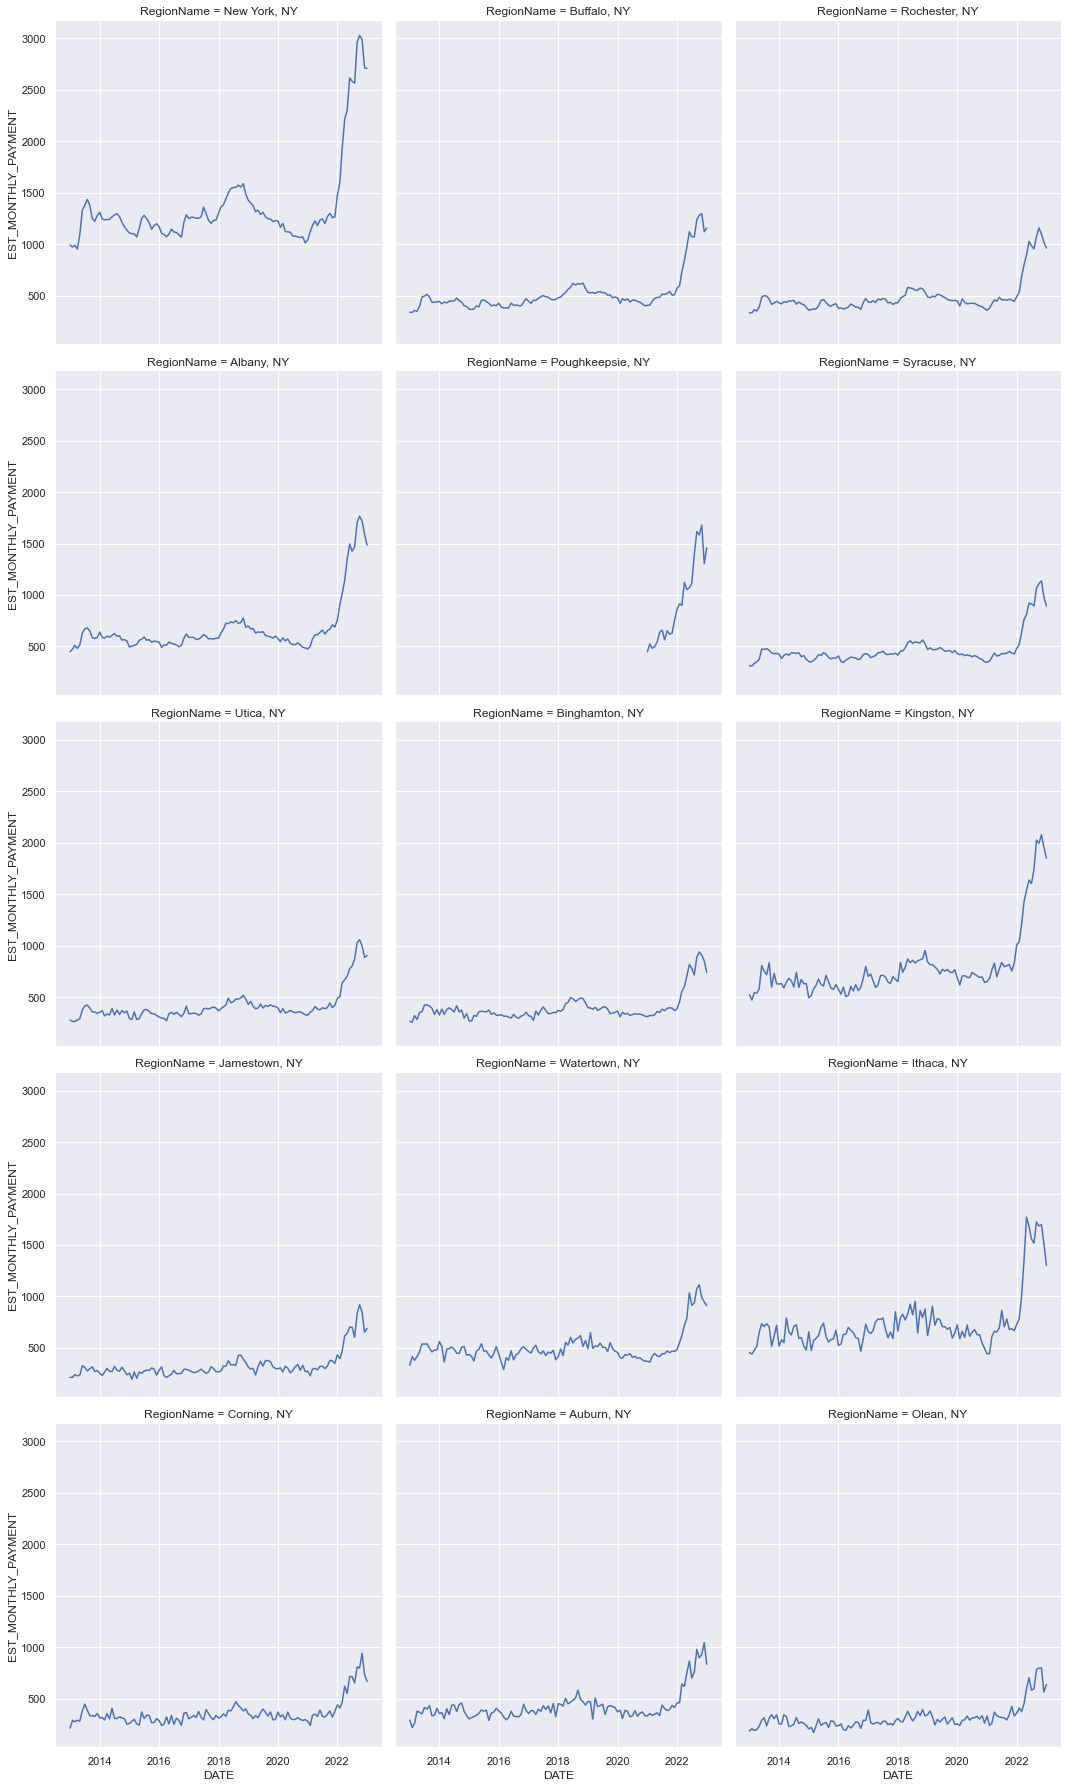

In [13]:
graph = sns.FacetGrid(psale_df_melted_IR, col ="RegionName", col_wrap = 3, height=5)
graph.map(plt.plot, "DATE", "EST_MONTHLY_PAYMENT")#.add_legend()

#add title
#plt.suptitle("Estimated Monthly Payments by Region (2013-2023)", fontsize=15)

plt.savefig('graphs_and_tables/Estimated_Monthly_Payments_by_Region_(2013-2023).png')
plt.show()

# Rent Price Analysis

In [14]:
#Load retal price datasets
rental_df = pd.read_csv('C:/Users/jlixa/Desktop/CUNY/Spring23/Data602/final_project/datasets/Metro_zori_sm_month.csv')

#Format column headers to snake case and upper case
rental_df.columns = rental_df.columns.str.replace(' ', '_')

#filter dataset to 'STATE' level
rental_df = rental_df[rental_df['StateName'] == "NY"]

rental_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28
1,394913,1,"New York, NY",msa,NY,2386.585780,2405.273501,2422.713710,2440.732457,2449.784467,...,3017.668773,3079.743085,3133.665788,3157.542046,3154.523579,3131.359562,3099.155451,3075.999271,3068.361445,3083.935335
49,394425,49,"Buffalo, NY",msa,NY,800.354703,812.496817,827.874922,831.583191,832.847030,...,1160.050296,1173.281690,1188.705918,1196.636629,1200.611976,1198.378781,1204.228340,1203.967082,1213.838434,1212.370846
52,395031,52,"Rochester, NY",msa,NY,947.089746,954.290055,958.922314,960.296032,969.789224,...,1350.499559,1376.364542,1391.625415,1403.166272,1393.028284,1383.840432,1370.582754,1367.561717,1378.596626,1377.790002
63,394308,63,"Albany, NY",msa,NY,1101.036715,1108.308159,1101.922841,1112.330642,1115.796766,...,1450.532811,1475.570126,1500.914771,1514.784188,1514.318738,1510.488925,1500.412767,1483.839786,1484.665384,1490.266171
87,845159,88,"Poughkeepsie, NY",msa,NY,1221.240399,1236.487947,1245.746632,1259.556441,1265.334502,...,2035.880757,2047.703707,2062.006639,2063.229409,2065.533902,2064.542455,2067.157666,2064.950238,2046.548525,2076.000660


In [15]:
rental_df_melted = rental_df.melt(id_vars=['RegionID','SizeRank','RegionName','RegionType','StateName'], 
                         var_name = 'Date', 
                         value_name = 'Med_Rent_Price'
                        )

rental_df_melted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Med_Rent_Price
0,394913,1,"New York, NY",msa,NY,2015-03-31,2386.585780
1,394425,49,"Buffalo, NY",msa,NY,2015-03-31,800.354703
2,395031,52,"Rochester, NY",msa,NY,2015-03-31,947.089746
3,394308,63,"Albany, NY",msa,NY,2015-03-31,1101.036715
4,845159,88,"Poughkeepsie, NY",msa,NY,2015-03-31,1221.240399


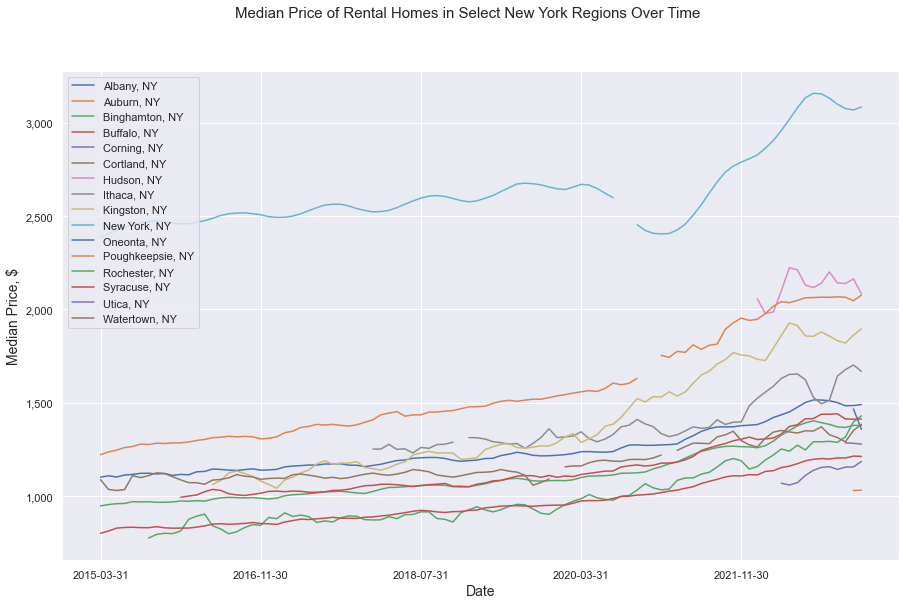

In [16]:
#Plot
fig7, ax7 = plt.subplots(figsize=(15,9)) #Create subplot

#add title
fig7.suptitle("Median Price of Rental Homes in Select New York Regions Over Time", fontsize=15)

#plot lines
for label, grp in rental_df_melted.groupby('RegionName'):
    grp.plot(x = "Date", y = 'Med_Rent_Price',ax = ax7, label = label)
    
#Axis edits
ax7.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax7.set_ylabel("Median Price, $")
ax7.yaxis.get_label().set_fontsize(14)
ax7.xaxis.get_label().set_fontsize(14)

#Save Graph
fig7.savefig('graphs_and_tables/Median_Price_of_Rental_Homes_in_Select_New_York_Regions_Over_Time.png')

In [17]:
#Getting % change between min(date) and max(date) - Rental Price
rental_df_datefiltered = rental_df[['RegionName', '2015-03-31', '2023-02-28']]
rental_df_datefiltered['Med_Rent_Price_Delta_$'] = (rental_df_datefiltered['2023-02-28']-rental_df_datefiltered['2015-03-31'])
rental_df_datefiltered['Med_Rent_Price_Delta_%']= round(rental_df_datefiltered['Med_Rent_Price_Delta_$']/rental_df_datefiltered['2023-02-28']*100, 2)
rental_df_datefiltered.dropna(inplace=True)
rental_df_datefiltered

#Export dataframe
dfi.export(psale_df_datefiltered,"graphs_and_tables/df_median_rent_cost_delta.png")

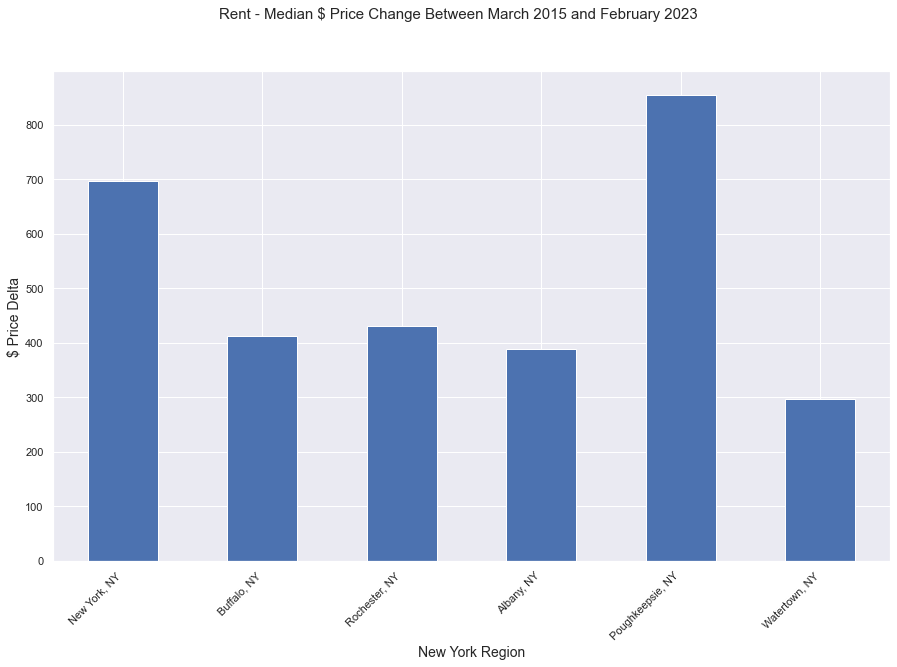

In [18]:
#Plot
fig8, ax8 = plt.subplots(figsize=(15,9)) #Create subplot

#add title
fig8.suptitle("Rent - Median $ Price Change Between March 2015 and February 2023", fontsize=15)

#plot bars
rental_df_datefiltered.plot(ax=ax8,
                           x= "RegionName",
                           y= "Med_Rent_Price_Delta_$",
                           kind='bar',
                           ylabel= "$ Price Delta",
                           xlabel= "New York Region")
#Axis edit
for label in ax8.get_xticklabels():
  label.set_rotation(45)
  label.set_ha('right')
ax8.yaxis.get_label().set_fontsize(14)
ax8.xaxis.get_label().set_fontsize(14)

#Legend edits
ax8.get_legend().remove()

#Save Graph
fig8.savefig('graphs_and_tables/Rent_-_Median_$_Price_Change_Between_March_2015_and_February_2023.png')

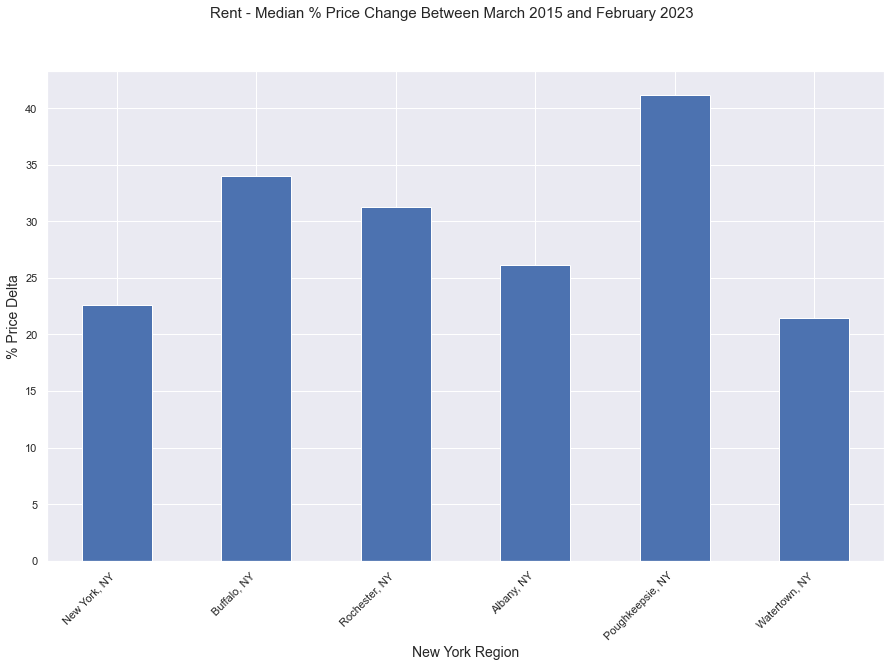

In [19]:
#Plot
fig9, ax9 = plt.subplots(figsize=(15,9)) #Create subplot

#add title
fig9.suptitle("Rent - Median % Price Change Between March 2015 and February 2023", fontsize=15)

#plot bars
rental_df_datefiltered.plot(ax=ax9,
                           x= "RegionName",
                           y= "Med_Rent_Price_Delta_%",
                           kind='bar',
                           ylabel= "% Price Delta",
                           xlabel= "New York Region")
#Axis edit
for label in ax9.get_xticklabels():
  label.set_rotation(45)
  label.set_ha('right')
ax9.yaxis.get_label().set_fontsize(14)
ax9.xaxis.get_label().set_fontsize(14)

#Legend edits
ax9.get_legend().remove()

#Save Graph
fig9.savefig('graphs_and_tables/Rent_-_Median_%_Price_Change_Between_March_2015_and_February_2023.png')

# Wage Analysis

In [20]:
def path_builder(yr):
    yr_str = str(yr)
    path1 = "C:/Users/jlixa/Dropbox/Spr23/Data602/final_project/datasets/Wage_data/annual_files/allhlcn"
    path2 = yr_str[len(yr_str) - 2:]
    return path1+path2+".xlsx"

def wage_df_creator(f_yr, l_yr):
    #print(f_yr)
    appended_data = pd.read_excel(path_builder(f_yr), 
                                  sheet_name='US_St_Cn_MSA',
                                 usecols="F,J,K,L,R")
    
    for year in range(f_yr+1,l_yr+1):
        #print(year)
        path = path_builder(year)
        data = pd.read_excel(path, 
                             sheet_name='US_St_Cn_MSA',
                                 usecols="F,J,K,L,R")
        
        #Append data to appended_data
        appended_data = appended_data.append(data, ignore_index=True)
    
    #appended_data = pd.concat(appended_data)

    return appended_data

In [21]:
#Load wage data
wage_data = wage_df_creator(2013,2021)

In [22]:
wage_data.Year.unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [23]:
wage_data.Industry.unique()

array(['Total, all industries', 'Goods-producing',
       'Natural resources and mining', 'Construction', 'Manufacturing',
       'Service-providing', 'Trade, transportation, and utilities',
       'Information', 'Financial activities',
       'Professional and business services',
       'Education and health services', 'Leisure and hospitality',
       'Other services', 'Unclassified', '10 Total, all industries',
       '101 Goods-producing', '1011 Natural resources and mining',
       '1012 Construction', '1013 Manufacturing', '102 Service-providing',
       '1021 Trade, transportation, and utilities', '1022 Information',
       '1023 Financial activities',
       '1024 Professional and business services',
       '1025 Education and health services',
       '1026 Leisure and hospitality', '1027 Other services',
       '1029 Unclassified'], dtype=object)

In [24]:
wage_data.Area.unique()

array(['U.S. TOTAL', 'Alabama -- Statewide', 'Autauga County, Alabama',
       ..., 'Unknown Or Undef., District of Columbia',
       'Chugach Census Area, Alaska', 'Copper River Census Area, Alaska'],
      dtype=object)

### Filter Wage DF

In [25]:
#Filter Industry
wage_df = wage_data[wage_data["Industry"].str.contains("Total, all industries")]

#Filter Ownership
wage_df = wage_df[wage_df["Ownership"]== "Total Covered"]


#Filter Area
area_lst = ["U.S. TOTAL", 
            "New York -- Statewide", 
            "Albany County, New York", 
            "Cayuga County, New York", 
            "Broome County, New York", 
            "Erie County, New York", 
            "Corning County, New York", 
            "Ithaca County, New York", 
            "Chautauqua County, New York", 
            "Ulster County, New York", 
            "New York County, New York", 
            "Oneonta County, New York", 
            "Cattaraugus County, New York",
            "Dutchess County, New York", 
            "Monroe County, New York", 
            "Onondaga County, New York", 
            "Oneida County, New York", 
            "Jefferson County, New York"]


wage_df = wage_df[wage_df['Area'].isin(area_lst)]
wage_df

,Year,Area,Ownership,Industry,Annual Average Pay
0,2013,U.S. TOTAL,Total Covered,"Total, all industries",49808
32722,2013,New York -- Statewide,Total Covered,"Total, all industries",63089
32740,2013,"Albany County, New York",Total Covered,"Total, all industries",51447
32794,2013,"Broome County, New York",Total Covered,"Total, all industries",38629
32812,2013,"Cattaraugus County, New York",Total Covered,"Total, all industries",37438
...,...,...,...,...,...
536163,2021,"Monroe County, New York",Total Covered,"10 Total, all industries",60023
536217,2021,"New York County, New York",Total Covered,"10 Total, all industries",158935
536253,2021,"Oneida County, New York",Total Covered,"10 Total, all industries",52366
536271,2021,"Onondaga County, New York",Total Covered,"10 Total, all industries",61221


#### Separate DF into County/cities, US total, New York state

In [26]:
#New York State Total
wage_df_NYS = wage_df[wage_df['Area']== "New York -- Statewide"]
wage_df_NYS

,Year,Area,Ownership,Industry,Annual Average Pay
32722,2013,New York -- Statewide,Total Covered,"Total, all industries",63089
95604,2014,New York -- Statewide,Total Covered,"Total, all industries",65880
158442,2015,New York -- Statewide,Total Covered,"Total, all industries",67521
221301,2016,New York -- Statewide,Total Covered,"Total, all industries",67940
284179,2017,New York -- Statewide,Total Covered,"10 Total, all industries",70682
347037,2018,New York -- Statewide,Total Covered,"10 Total, all industries",72900
409887,2019,New York -- Statewide,Total Covered,"10 Total, all industries",75365
472693,2020,New York -- Statewide,Total Covered,"10 Total, all industries",83122
535659,2021,New York -- Statewide,Total Covered,"10 Total, all industries",88035


In [27]:
#New York State Total
wage_df_US = wage_df[wage_df['Area']== "U.S. TOTAL"]
wage_df_US

,Year,Area,Ownership,Industry,Annual Average Pay
0,2013,U.S. TOTAL,Total Covered,"Total, all industries",49808
62835,2014,U.S. TOTAL,Total Covered,"Total, all industries",51364
125701,2015,U.S. TOTAL,Total Covered,"Total, all industries",52942
188613,2016,U.S. TOTAL,Total Covered,"Total, all industries",53621
251501,2017,U.S. TOTAL,Total Covered,"10 Total, all industries",55390
314359,2018,U.S. TOTAL,Total Covered,"10 Total, all industries",57266
377248,2019,U.S. TOTAL,Total Covered,"10 Total, all industries",59209
440067,2020,U.S. TOTAL,Total Covered,"10 Total, all industries",64021
502959,2021,U.S. TOTAL,Total Covered,"10 Total, all industries",67610


In [28]:
#By County
exlude_lst = ["U.S. TOTAL","New York -- Statewide"]
wage_df_filtered = wage_df[~wage_df.Area.isin(exlude_lst)]
wage_df_filtered

,Year,Area,Ownership,Industry,Annual Average Pay
32740,2013,"Albany County, New York",Total Covered,"Total, all industries",51447
32794,2013,"Broome County, New York",Total Covered,"Total, all industries",38629
32812,2013,"Cattaraugus County, New York",Total Covered,"Total, all industries",37438
32830,2013,"Cayuga County, New York",Total Covered,"Total, all industries",38465
32848,2013,"Chautauqua County, New York",Total Covered,"Total, all industries",34462
...,...,...,...,...,...
536163,2021,"Monroe County, New York",Total Covered,"10 Total, all industries",60023
536217,2021,"New York County, New York",Total Covered,"10 Total, all industries",158935
536253,2021,"Oneida County, New York",Total Covered,"10 Total, all industries",52366
536271,2021,"Onondaga County, New York",Total Covered,"10 Total, all industries",61221


### Plot Wage Trends

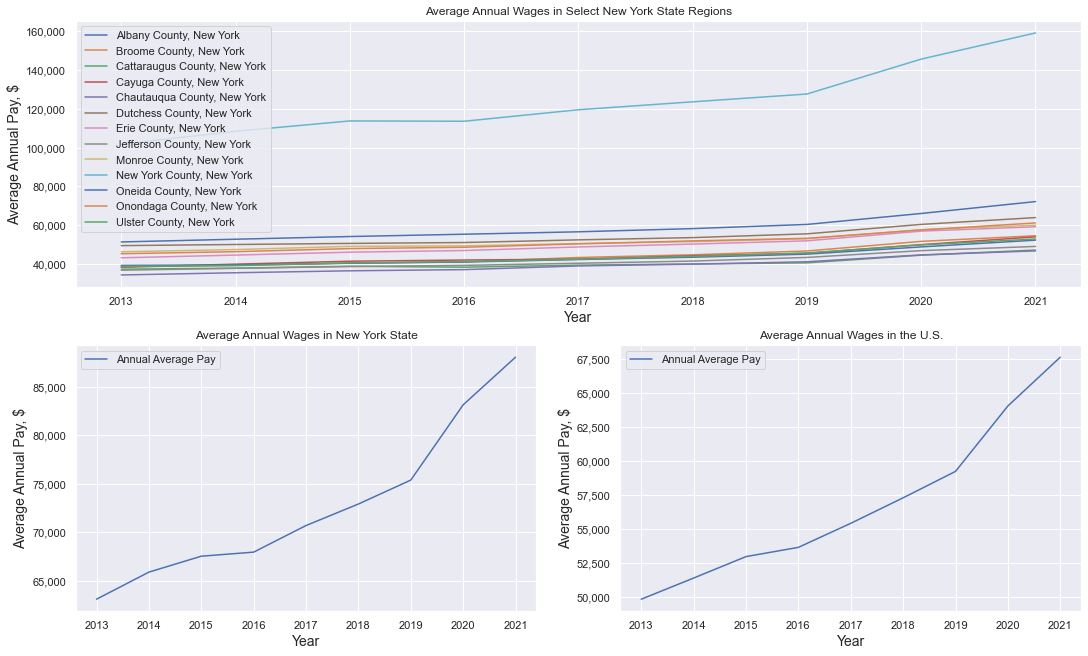

In [29]:
fig12 = plt.figure(figsize=(15, 9), layout="constrained")
spec = fig12.add_gridspec(2, 2)

#all counties plot
ax12 = fig12.add_subplot(spec[0, :])


#plot lines
for label, grp in wage_df_filtered.groupby('Area'):
    grp.plot(x = "Year", y = 'Annual Average Pay',ax = ax12, label = label)
    
#Axis edits
ax12.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax12.set_ylabel("Average Annual Pay, $")
ax12.yaxis.get_label().set_fontsize(14)
ax12.xaxis.get_label().set_fontsize(14)
ax12.title.set_text('Average Annual Wages in Select New York State Regions')

#----------------------------------------------------------------------------------

# #New york State total plot
ax13 = fig12.add_subplot(spec[1, 0])

#plot lines
wage_df_NYS.plot(x = "Year", y = 'Annual Average Pay',ax = ax13)
    
#Axis edits
ax13.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax13.set_ylabel("Average Annual Pay, $")
ax13.yaxis.get_label().set_fontsize(14)
ax13.xaxis.get_label().set_fontsize(14)
ax13.title.set_text('Average Annual Wages in New York State')

# #----------------------------------------------------------------------------------

#US total plot
ax14 = fig12.add_subplot(spec[1, 1])

#plot lines
wage_df_US.plot(x = "Year", y = 'Annual Average Pay',ax = ax14)
    
#Axis edits
ax14.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax14.set_ylabel("Average Annual Pay, $")
ax14.yaxis.get_label().set_fontsize(14)
ax14.xaxis.get_label().set_fontsize(14)
ax14.title.set_text('Average Annual Wages in the U.S.')


#Save Graph
fig12.savefig('graphs_and_tables/Average_Annual_Wages_in_New_York_State.png')

In [30]:
#Getting % change between min(date) and max(date) - Rental Price
wage_df_datefiltered = wage_df[['Year','Area', 'Annual Average Pay']]
options = [2013,2021]
wage_df_datefiltered = wage_df_datefiltered[wage_df_datefiltered['Year'].isin(options)]
wage_df_datefiltered_wide = pd.pivot(wage_df_datefiltered, index='Area', columns='Year', values='Annual Average Pay').reset_index()
wage_df_datefiltered_wide['Avg_Wage_Delta_$'] = wage_df_datefiltered_wide[2021] - wage_df_datefiltered_wide[2013]
wage_df_datefiltered_wide['Avg_Wage_Delta_%']= round(wage_df_datefiltered_wide['Avg_Wage_Delta_$']/wage_df_datefiltered_wide[2021]*100, 2)

wage_df_datefiltered_wide

#Export dataframe
dfi.export(wage_df_datefiltered_wide,"graphs_and_tables/df_average_wage_delta.png")

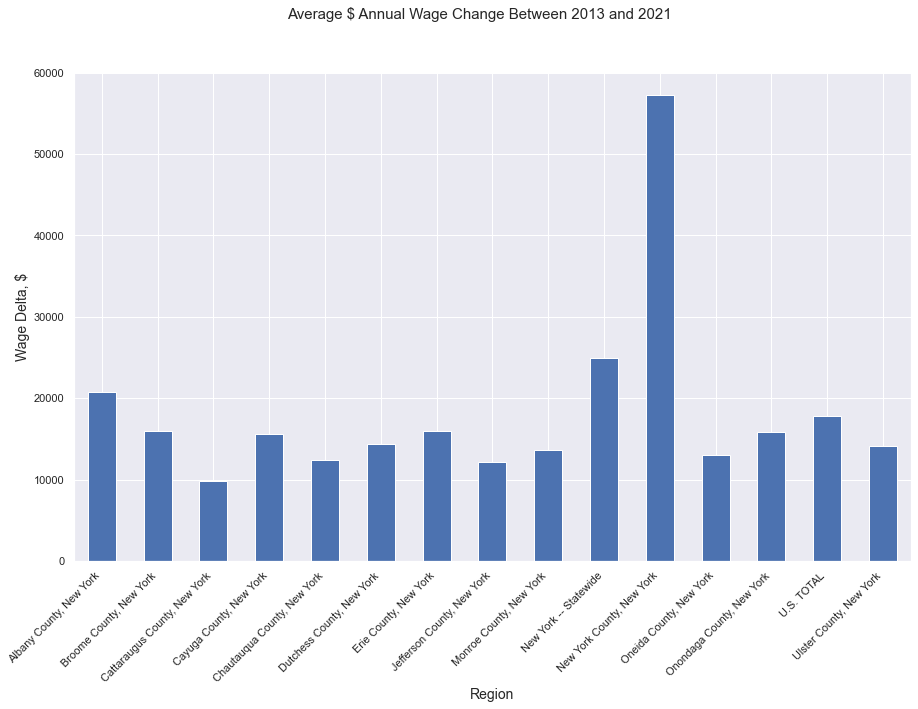

In [31]:
#Plot
fig15, ax15 = plt.subplots(figsize=(15,9)) #Create subplot

#add title
fig15.suptitle("Average $ Annual Wage Change Between 2013 and 2021", fontsize=15)

#plot bars
wage_df_datefiltered_wide.plot(ax=ax15,
                           x= "Area",
                           y= "Avg_Wage_Delta_$",
                           kind='bar',
                           ylabel= "Wage Delta, $",
                           xlabel= "Region")
#Axis edit
for label in ax15.get_xticklabels():
  label.set_rotation(45)
  label.set_ha('right')
ax15.yaxis.get_label().set_fontsize(14)
ax15.xaxis.get_label().set_fontsize(14)

#Legend edits
ax15.get_legend().remove()

#Save Graph
fig15.savefig('graphs_and_tables/Average_$_Annual_Wage_Change_Between_2013_and_2021.png')

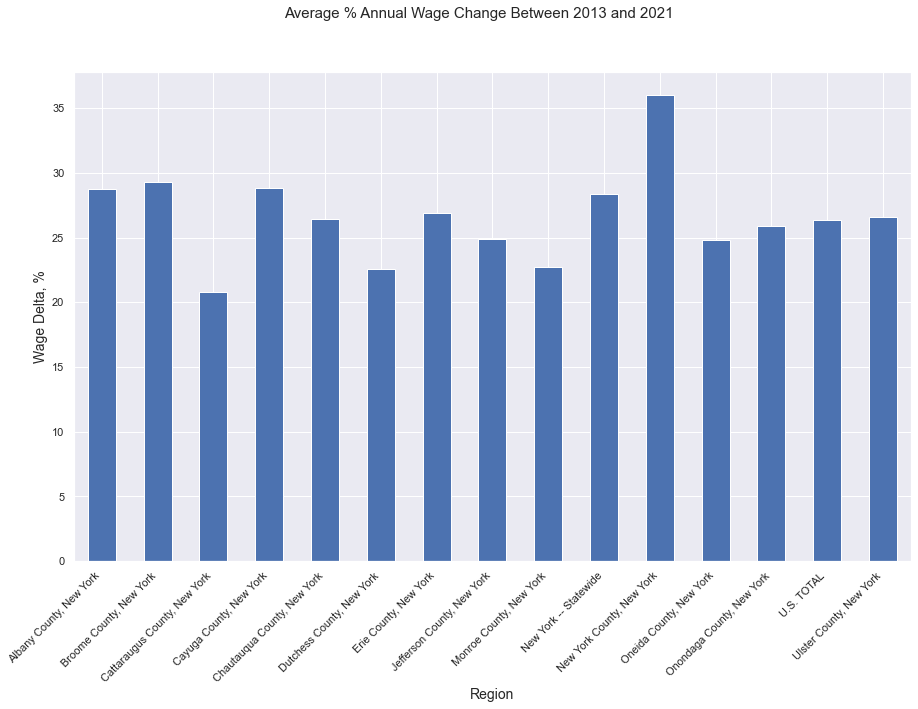

In [32]:
#Plot
fig16, ax16 = plt.subplots(figsize=(15,9)) #Create subplot

#add title
fig16.suptitle("Average % Annual Wage Change Between 2013 and 2021", fontsize=15)

#plot bars
wage_df_datefiltered_wide.plot(ax=ax16,
                           x= "Area",
                           y= "Avg_Wage_Delta_%",
                           kind='bar',
                           ylabel= "Wage Delta, %",
                           xlabel= "Region")
#Axis edit
for label in ax16.get_xticklabels():
  label.set_rotation(45)
  label.set_ha('right')
ax16.yaxis.get_label().set_fontsize(14)
ax16.xaxis.get_label().set_fontsize(14)

#Legend edits
ax16.get_legend().remove()

#Save Graph
fig16.savefig('graphs_and_tables/Average_%_Annual_Wage_Change_Between_2013_and_2021.png')